In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
train = pd.read_csv("dji.csv")
train = train.drop('count',axis=1)
train.head()

,date,anger_score,disgust_score,fear_score,joy_score,sadness_score,anger_count,disgust_count,fear_count,joy_count,sadness_count,close,open,high,low,change
0,20110411,23.678598,1.862068,3.365532,129.260966,22.046661,28,2,4,150,26,12381.11,12380.43,12476.93,12319.35,0.0001
1,20110412,23.436641,1.568504,1.807040,110.107599,28.552481,28,2,2,128,33,12263.58,12381.04,12381.04,12185.09,-0.9500
2,20110413,17.595715,3.441165,3.351268,103.535217,17.206766,21,4,4,121,21,12270.99,12263.73,12372.94,12203.63,0.0006
3,20110414,16.065135,4.921378,5.183304,102.417106,15.457086,19,6,6,121,18,12285.15,12270.24,12332.71,12137.98,0.0012
4,20110415,16.869910,1.555661,3.334624,121.630811,14.709462,20,2,4,141,18,12341.83,12285.45,12402.61,12238.34,0.0046


In [23]:
train.isnull().sum()

date             0
anger_score      0
disgust_score    0
fear_score       0
joy_score        0
sadness_score    0
anger_count      0
disgust_count    0
fear_count       0
joy_count        0
sadness_count    0
close            0
open             0
high             0
low              0
change           0
dtype: int64

In [3]:
train['date'] = train['date'].apply(lambda x : str(x))
year = train['date'].str[0:4]
month = train['date'].str[4:6]
day = train['date'].str[6:]
train = train.drop('date',axis=1)
train = pd.concat([year,month,day,train],axis=1)

In [4]:
train.columns = ['year', 'month', 'day', 'anger_score', 'disgust_score', 'fear_score',
       'joy_score', 'sadness_score', 'anger_count', 'disgust_count',
       'fear_count', 'joy_count', 'sadness_count','close', 'open',
       'high', 'low', 'change']

In [5]:
%matplotlib tk
#%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, axes = plt.subplots(1,3,squeeze=False)
plt.figure(figsize=(40,20))
sns.boxplot(data = train, y = 'close', x = 'year',ax= axes[0][0])
sns.boxplot(data = train, y = 'close', x = 'month',ax= axes[0][1])
sns.boxplot(data = train, y = 'close', x = 'day',ax= axes[0][2])


In [6]:
%matplotlib tk
#plt.figure(figsize=(60,80))
sns.pairplot(data = train.iloc[:,[4,5,6,7,8,13]])
plt.show()

In [7]:
%matplotlib tk
#plt.figure(figsize=(60,80))
sns.pairplot(data = train.iloc[:,[9,10,11,12,13]])
plt.show()

In [66]:
train.corr()['close'].sort_values(ascending=False)[4:]

joy_score        0.351618
joy_count        0.349471
change           0.283326
sadness_count    0.264606
sadness_score    0.264418
disgust_score    0.143431
disgust_count    0.142194
anger_count      0.135649
anger_score      0.135138
fear_score       0.057058
fear_count       0.053915
Name: close, dtype: float64

In [72]:
train.corr()['change'].sort_values(ascending=False)[5:]

joy_score        0.132604
joy_count        0.131471
sadness_count    0.088584
sadness_score    0.082264
anger_count      0.020200
anger_score      0.018540
disgust_count   -0.003039
disgust_score   -0.005274
fear_count      -0.017380
fear_score      -0.021698
Name: change, dtype: float64

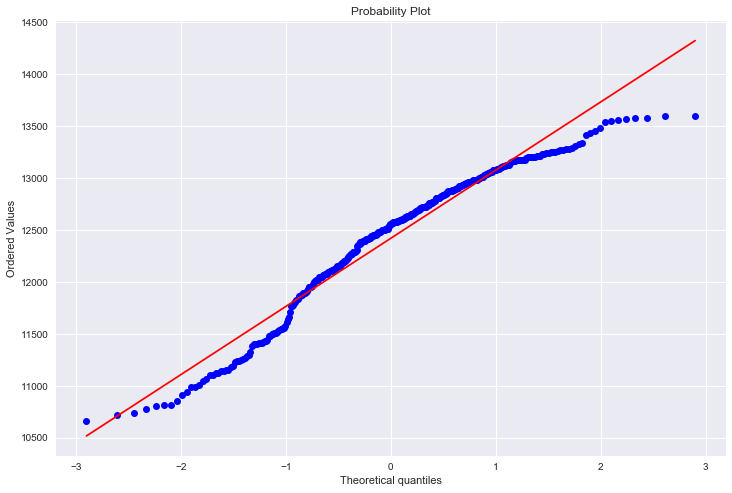

In [82]:
%matplotlib inline
plt.figure(figsize=(12,8))
stats.probplot(train['close'],plot=plt)
plt.show()

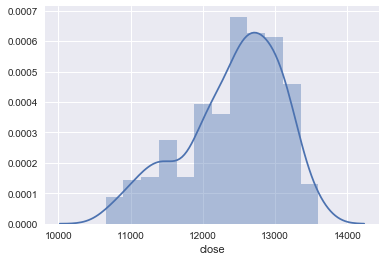

In [81]:
sns.distplot((train['close']))

In [28]:
from scipy.stats import norm
close_log = np.log1p(train['close'])
sns.distplot(close_log,fit=norm)

TypeError: distplot() got an unexpected keyword argument 'plot'

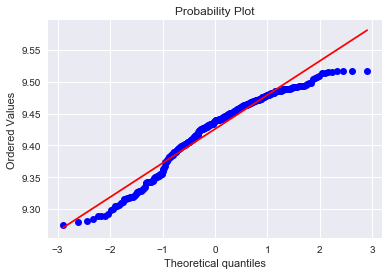

In [31]:
%matplotlib inline
stats.probplot(close_log,fit=norm,plot=plt)
plt.show()

In [90]:
norm.fit(train['close'])

(12419.378360215054, 666.4088370401569)

In [91]:
norm.fit(close_log)

(9.425615830359027, 0.05474075318932476)

In [32]:
train.head()

,year,month,day,anger_score,disgust_score,fear_score,joy_score,sadness_score,anger_count,disgust_count,fear_count,joy_count,sadness_count,close,open,high,low,change
0,2011,04,11,23.678598,1.862068,3.365532,129.260966,22.046661,28,2,4,150,26,12381.11,12380.43,12476.93,12319.35,0.0001
1,2011,04,12,23.436641,1.568504,1.807040,110.107599,28.552481,28,2,2,128,33,12263.58,12381.04,12381.04,12185.09,-0.9500
2,2011,04,13,17.595715,3.441165,3.351268,103.535217,17.206766,21,4,4,121,21,12270.99,12263.73,12372.94,12203.63,0.0006
3,2011,04,14,16.065135,4.921378,5.183304,102.417106,15.457086,19,6,6,121,18,12285.15,12270.24,12332.71,12137.98,0.0012
4,2011,04,15,16.869910,1.555661,3.334624,121.630811,14.709462,20,2,4,141,18,12341.83,12285.45,12402.61,12238.34,0.0046


In [19]:
train.to_csv("data.csv",index=False)

0    12381.11
1    12263.58
2    12270.99
3    12285.15
4    12341.83
Name: close, dtype: float64